# Telco Customer Churn

### Focused customer retention programs

The purpose of this project is to do exploratory data analysis (EDA) and using machine learning models to foreign telecom company to predict the likelihood of a customer leaving the company and not activating the subscripti on, as well as identify the factors that cause customers to abandon the subscription activation. The data for this study came from Kaggle.

# Dataset

### Telcom Customer Churn

Telcom Customer Churn dataset will be used in this project. it’s Kaggle open dataset that contains 7043 rows (customers) and 21 columns (features).And the “Churn” column is our target Here a CSV file. [Link](https://www.kaggle.com/blastchar/telco-customer-churn)

### Import libraries

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from  matplotlib.ticker import PercentFormatter

### Extract and Preliminarily explore the dataset

In [2]:
## load in the dataset into a pandas dataframe
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 

In [3]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1. Understand the dataset:

 **a- How many rows and columns?**

In [4]:
#number of rows and columns in dataset
dataset.shape

(7043, 21)

**b- What is the number of unique elements in each column?**

In [5]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**c- Present a statistic description of the features.**

In [6]:
#convert TotalCharges to float 
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')

In [7]:
#dataset after converting TotalCharges      
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#statistical description of the numerical column
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 2. Check the validity of the dataset:

**Missing values**

In [9]:
#identify null value 
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#identify rows of null value 
dataset[dataset['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
#replace null value with the mean 
x = dataset["TotalCharges"].mean()

dataset["TotalCharges"].fillna(x, inplace = True)

In [12]:
dataset.shape

(7043, 21)

In [13]:
#make sure there is no null value 
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Irrelevant or incorrect values**

In [14]:
# test if there is negitaive values (value<0)  to find irrevlent or incorrect values 
(dataset[['SeniorCitizen' , 'tenure' , 'MonthlyCharges' , 'TotalCharges']].values < 0).any()

False

In [15]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Duplication**

In [16]:
#Find duplicate
dataset.duplicated().sum()

0

In [17]:
#Function that converts the catagory column into two types value to '0' for No app and '1' for yes
def numrical(x):
    if x == 'No':
        return 0
    else:
        return 1

dataset['Partner'] = dataset['Partner'].map(numrical) #updated type value
dataset['Dependents'] = dataset['Dependents'].map(numrical) #updated type value
dataset['PhoneService'] = dataset['PhoneService'].map(numrical) #updated type value
dataset['OnlineSecurity'] = dataset['OnlineSecurity'].map(numrical) #updated type value
dataset['OnlineBackup'] = dataset['OnlineBackup'].map(numrical) #updated type value
dataset['DeviceProtection'] = dataset['DeviceProtection'].map(numrical) #updated type value
dataset['TechSupport'] = dataset['TechSupport'].map(numrical) #updated type value
dataset['StreamingTV'] = dataset['StreamingTV'].map(numrical) #updated type value
dataset['StreamingMovies'] = dataset['StreamingMovies'].map(numrical) #updated type value
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].map(numrical) #updated type value
dataset['Churn'] = dataset['Churn'].map(numrical) #updated type value
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
dataset.gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['gender'],drop_first=True)],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0


In [20]:
dataset.MultipleLines.nunique()

3

In [21]:
dataset.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

Using get dummies for (<mark>MultipleLines</mark>, <mark>InternetService</mark>,<mark>Contract</mark> , <mark>PaymentMethod</mark>) column to convect catagoracal value to binary columns with drop first to avoid multicoleniarty

In [22]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['MultipleLines'], prefix='Mul',drop_first=True)],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Mul_No phone service,Mul_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0


In [23]:
dataset.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [24]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['InternetService'], prefix='int',drop_first=True)],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,1,Electronic check,29.85,29.85,0,0,1,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,0,Mailed check,56.95,1889.50,0,1,0,0,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,1,Mailed check,53.85,108.15,1,1,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,1,Electronic check,70.70,151.65,1,0,0,0,1,0


In [25]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Contract'], prefix='Con',drop_first=True)],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No,Con_One year,Con_Two year
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,29.85,29.85,0,0,1,0,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,56.95,1889.50,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,53.85,108.15,1,1,0,0,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,42.30,1840.75,0,1,1,0,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,70.70,151.65,1,0,0,0,1,0,0,0


In [26]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['PaymentMethod'], prefix='Pay',drop_first=True)],axis=1)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,1,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
dataset.drop(columns=['MultipleLines', 'InternetService','Contract' , 'PaymentMethod'], inplace=True)

In [28]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7043 non-null   object 
 1   gender                       7043 non-null   object 
 2   SeniorCitizen                7043 non-null   int64  
 3   Partner                      7043 non-null   int64  
 4   Dependents                   7043 non-null   int64  
 5   tenure                       7043 non-null   int64  
 6   PhoneService                 7043 non-null   int64  
 7   OnlineSecurity               7043 non-null   int64  
 8   OnlineBackup                 7043 non-null   int64  
 9   DeviceProtection             7043 non-null   int64  
 10  TechSupport                  7043 non-null   int64  
 11  StreamingTV                  7043 non-null   int64  
 12  StreamingMovies              7043 non-null   int64  
 13  PaperlessBilling  

In [30]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,1,...,1,1,0,0,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# 3. Exploratory Data Analysis (EDA)

#### The EDA will analyze the dataset and take care to these questions:

In [31]:
#drop customerID coulmn 
dataset.drop('customerID',
  axis= 1, inplace=True)

In [32]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Male,Mul_No phone service,Mul_Yes,int_Fiber optic,int_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check
0,Female,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,Male,0,0,0,34,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,Male,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,Male,0,0,0,45,0,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,0,1,1,...,1,0,1,0,0,1,0,0,0,1
7039,Female,0,1,1,72,1,0,1,1,0,...,0,0,1,1,0,1,0,1,0,0
7040,Female,0,1,1,11,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7041,Male,1,1,0,4,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1


**a. What is the percentage for each gender which left the company? Does gender
has an effect on churn?**

In [33]:
dataset['gender'].value_counts(normalize=True) * 100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

In [34]:
#percentage for each gender which left and stayed within the company
stayCustomer = dataset[dataset.Churn == 0].shape[0]
leaveCustomer = dataset[dataset.Churn == 1].shape[0]

print(stayCustomer / (stayCustomer + leaveCustomer) * 100, '% of customer staying')
print(leaveCustomer / (stayCustomer + leaveCustomer) * 100, '% of customer leaving')


73.4630129206304 % of customer staying
26.536987079369588 % of customer leaving


<AxesSubplot:xlabel='gender', ylabel='count'>

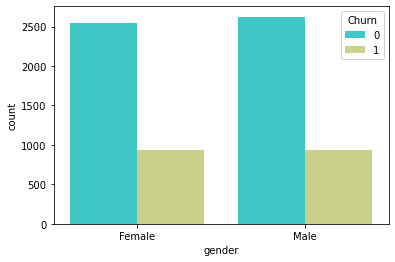

In [35]:
sns.countplot(x = 'gender' , hue = 'Churn', data = dataset , palette='rainbow')

**b. What is the percentage of elderly people in the company?**

In [36]:
#percentage of elderly people in the company
elderlyPeople = dataset[dataset.SeniorCitizen == 1 ].shape[0]
notElderlyPeople = dataset[dataset.SeniorCitizen == 0 ].shape[0]

oldpercent = elderlyPeople / (elderlyPeople + notElderlyPeople) * 100
notOldpercent = notElderlyPeople / (elderlyPeople + notElderlyPeople) * 100

print(oldpercent, '% of the customer are elderly people in the company')

16.21468124378816 % of the customer are elderly people in the company


In [37]:
dataset.drop_duplicates(inplace = True)

In [38]:
dataset.shape

(7021, 26)

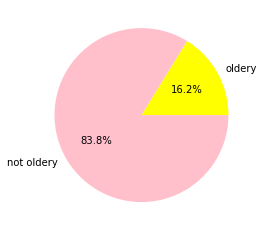

In [39]:
#present the percentage with pie chart 
#sns.countplot(x = dataset['SeniorCitizen'])
z = [oldpercent , notOldpercent]
type = ['oldery' , 'not oldery']
color = ['yellow' , 'pink']
plt.pie(z , labels = type , autopct = '%2.1f%%', colors = color)
plt.show()

**c. What is the effect of tenure length on churn?**

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

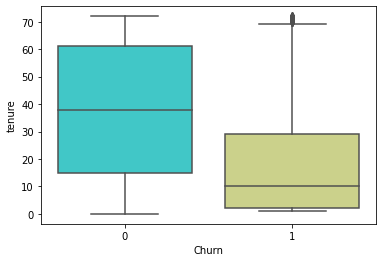

In [40]:
#effect of tenure length on churn
sns.boxplot(x = 'Churn' , y = 'tenure' , data = dataset, palette='rainbow' )
sns.boxplot

In [41]:
#save dataset 
dataset.to_csv('finalEx.csv', index = False)

# 4. Modeling

Now, building a models to predict Rating. My Target is Column churn, this target is continuous values, so I going to using three regression models.

* LinearRegression
* DecisionTreeRegressor
* RandomForestRegressor

Will build these models by using only numerical features.


In [42]:
# Import libraries for models
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7021 non-null   object 
 1   SeniorCitizen                7021 non-null   int64  
 2   Partner                      7021 non-null   int64  
 3   Dependents                   7021 non-null   int64  
 4   tenure                       7021 non-null   int64  
 5   PhoneService                 7021 non-null   int64  
 6   OnlineSecurity               7021 non-null   int64  
 7   OnlineBackup                 7021 non-null   int64  
 8   DeviceProtection             7021 non-null   int64  
 9   TechSupport                  7021 non-null   int64  
 10  StreamingTV                  7021 non-null   int64  
 11  StreamingMovies              7021 non-null   int64  
 12  PaperlessBilling             7021 non-null   int64  
 13  MonthlyCharges    

In [44]:
# Exclude non-numerical features and drop null values 
dataset_df = dataset.select_dtypes(exclude=['object']).copy()
dataset_df.dropna(inplace=True)
# print information of df
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                7021 non-null   int64  
 1   Partner                      7021 non-null   int64  
 2   Dependents                   7021 non-null   int64  
 3   tenure                       7021 non-null   int64  
 4   PhoneService                 7021 non-null   int64  
 5   OnlineSecurity               7021 non-null   int64  
 6   OnlineBackup                 7021 non-null   int64  
 7   DeviceProtection             7021 non-null   int64  
 8   TechSupport                  7021 non-null   int64  
 9   StreamingTV                  7021 non-null   int64  
 10  StreamingMovies              7021 non-null   int64  
 11  PaperlessBilling             7021 non-null   int64  
 12  MonthlyCharges               7021 non-null   float64
 13  TotalCharges      

In [45]:
# Compute correlation for the target and other features 
dataset_df.corr()['Churn'].sort_values(ascending=False)

Churn                          1.000000
int_Fiber optic                0.308170
Pay_Electronic check           0.301544
MonthlyCharges                 0.194508
PaperlessBilling               0.190891
SeniorCitizen                  0.151619
Mul_Yes                        0.041958
PhoneService                   0.011323
Male                          -0.008763
Mul_No phone service          -0.011323
Pay_Mailed check              -0.092562
StreamingTV                   -0.127197
StreamingMovies               -0.129117
Pay_Credit card (automatic)   -0.133666
Partner                       -0.149135
Dependents                    -0.163459
Con_One year                  -0.177336
TotalCharges                  -0.198303
int_No                        -0.228533
DeviceProtection              -0.251465
OnlineBackup                  -0.267049
Con_Two year                  -0.302076
TechSupport                   -0.336861
OnlineSecurity                -0.342255
tenure                        -0.351508


As shown, there are weak correlation between target and other features. As a result, LinearRegression's performance can be bad, but it's possible to get a good performance from Decision Tree Regressor and Random Forest Regressor.

In [46]:
## Brak dataset to X=all features to be used for training except "target", y=target variabl
X = dataset_df.drop(columns=['Churn']).values
y = dataset_df['Churn'].values

# Split dataset to 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#  Create the scaler with parameters as default
scaler = StandardScaler()
# Fit the scaler passing the trainset and transforms it 
X_scaled = scaler.fit_transform(X_train)
# Transform testset with the same fitted scaler to prevent data leakage.
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [47]:
LRmodel = LinearRegression()
LRmodel.fit(X_scaled,y_train)
print('r^2 to Linear Regression:',LRmodel.score(X_scaled,y_train))

r^2 to Linear Regression: 0.285663072574147


r^2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
 

## Random Forest Regressor Model

In [48]:
rf_model = RandomForestRegressor(n_estimators=122)
rf_model.fit(X_scaled,y_train)
print('r^2 to RandomForestRegressor:',rf_model.score(X_scaled,y_train))

r^2 to RandomForestRegressor: 0.890286977835367


Random forest regressor model get about 0.9 that is better than decision tree regressor model. 

In [49]:
#n_estimators change
# search for an optimal value of K for KNN
estimators = np.arange(50, 300, 50)
mse_list = []
r2_list = []
for i in estimators:
    rf_model = RandomForestRegressor()
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_scaled, y_train)
    y_pre=rf_model.predict(X_test_scaled)
    r2_list.append(rf_model.score(X_test_scaled,y_test))
    mse_list.append(mean_squared_error(y_test, y_pre))

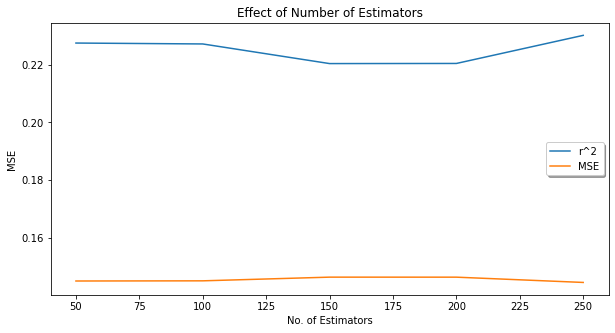

In [50]:
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE") # Mean Square Error
plt.title("Effect of Number of Estimators")
plt.plot(estimators, r2_list)
plt.plot(estimators, mse_list)
plt.legend(['r^2','MSE'],shadow = True, loc = 0);

From this graph note is the best estetor was 100, highest r^2 and the lowest Mean square error.

Mean square error (MSE) is the average of the square of the errors.
Now will fitting the random forest regressor model with estimator equal 100 and predict testset.

 

In [51]:
# fitting trainset
rf_model.set_params(n_estimators=100)
rf_model.fit(X_scaled, y_train)
# predict test set
y_pre=rf_model.predict(X_test_scaled)
# print r^2 to testset
print("r^2 of testset to Random Forest Regressor:",rf_model.score(X_test_scaled,y_test))

r^2 of testset to Random Forest Regressor: 0.22953249323721558


In [52]:
rf_mse = mean_squared_error(y_test, y_pre)
print("Mean squared error to Random Forest Regressor:",rf_mse)

Mean squared error to Random Forest Regressor: 0.1446680787663108


## Decision Tree Regressor

In [53]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_scaled,y_train)
print('r^2 to DecisionTreeRegressor:',dt_model.score(X_scaled,y_train))

r^2 to DecisionTreeRegressor: 0.9931922376639613


In [54]:
#n_estimators change
# search for an optimal value of K for KNN
max_depth = np.arange(1, 30, 5)
mse_list = []
r2_list = []
for i in max_depth:
    dt_model = DecisionTreeRegressor(max_depth = i)
    dt_model.fit(X_scaled, y_train)
    y_pre=dt_model.predict(X_test_scaled)
    r2_list.append(dt_model.score(X_test_scaled,y_test))
    mse_list.append(mean_squared_error(y_test, y_pre))

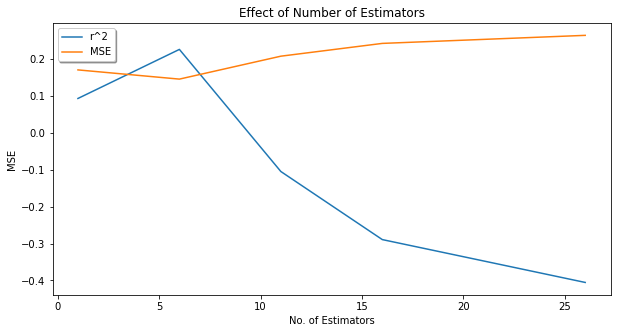

In [55]:
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE") # Mean Square Error
plt.title("Effect of Number of Estimators")
plt.plot(max_depth, r2_list)
plt.plot(max_depth, mse_list)
plt.legend(['r^2','MSE'],shadow = True, loc = 0);

## K-Folds

In [56]:
# Split dataset to 80% for training and 20% for testing
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#  Create the scaler with parameters as default
scaler = StandardScaler()
# Fit the scaler passing the trainset and transforms it 
X_scaled = scaler.fit_transform(X)
# Transform testset with the same fitted scaler to prevent data leakage.
X_test_scaled = scaler.transform(X_test)

In [57]:
# Creat Kfold with 5 splits and shuffle
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
# Creat Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)
# Print the average of cross-validation
print('Mean of r^2 to Random Forest Regressor:',np.mean(cross_val_score(rf_model,X_scaled, y,cv=kf,scoring='r2')))

Mean of r^2 to Random Forest Regressor: 0.24964239069171815


In [58]:
#n_estimators change
# search for an optimal value of K for KNN
estimators = np.arange(50, 300, 50)
mse_list = []
r2_list = []
for i in estimators:
    rf_model = RandomForestRegressor()
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_scaled, y)
    y_pre=rf_model.predict(X_test_scaled)
    r2_list.append(rf_model.score(X_test_scaled,y_test))
    mse_list.append(mean_squared_error(y_test, y_pre))

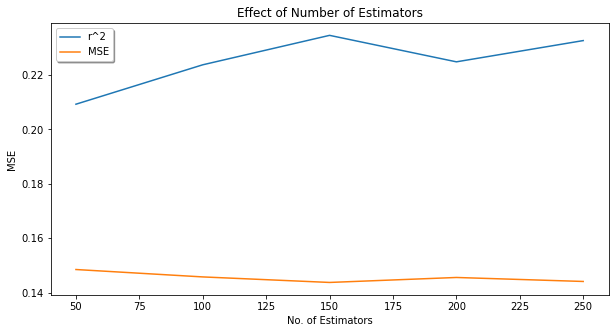

In [59]:
plt.figure(figsize=(10, 5))
plt.xlabel("No. of Estimators")
plt.ylabel("MSE")
plt.title("Effect of Number of Estimators")
plt.plot(estimators, r2_list)
plt.plot(estimators, mse_list)
plt.legend(['r^2','MSE'],shadow = True, loc = 0);

# save model

In [60]:
from joblib import dump , load
dump(rf_mse, 'rf_model.pkl')

['rf_model.pkl']

# Thank You :)